In [2]:
from __init__ import *
from rain import *
from common import *
from tools import *

%matplotlib inline
import mpld3 

In [3]:
path = './input/'

rg = Rain(path=path, name='StLouis_MSD_gage_{YEAR}.csv', year=range(2009, 2015), ngages=101)
rad = Rain(path=path, name='StLouis_MSD_radar_{YEAR}.csv', year=range(2009, 2015), ngages=101)
rg.ll_file = 'StLouis_MSD_lat_lon_{YEAR}.csv'.format(YEAR=rg.year)
rg.get_ll(cols=['lat','lon'])
rad.ll = rg.ll
p = RadarGage(gage=rg, radar=rad)
p.get_nonan()

In [4]:
p.save_path = rg.save_path = rad_save_path = './output/StLouis/'

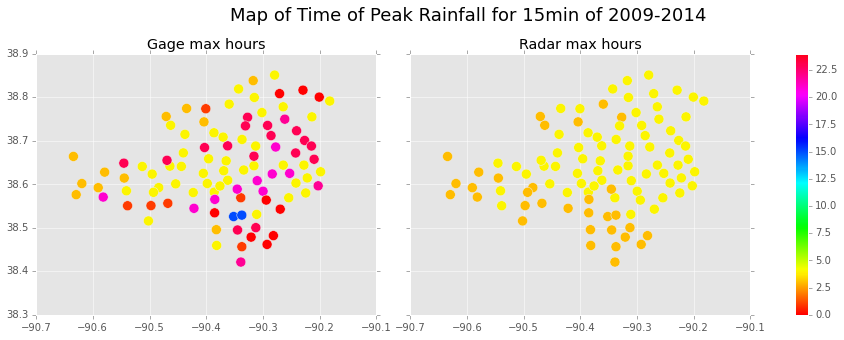

In [7]:
rg.plot_rate(gage=p.list_gages(), time_step='15min', interval='diurnal', bar=False, m=[4,5,6,7,8,9])
rad.plot_rate(gage=p.list_gages(), time_step='15min', interval='diurnal', bar=False, m=[4,5,6,7,8,9])

df = pd.DataFrame({'Gage max hours': rg.df.idxmax(), 'Radar max hours': rad.df.idxmax()})
map_rain(p.ll.join(df), cmap='hsv', sharec=(0,24), 
         save_path=p.save_path,
         title='Map of Time of Peak Rainfall for 15min of 2009-2014')

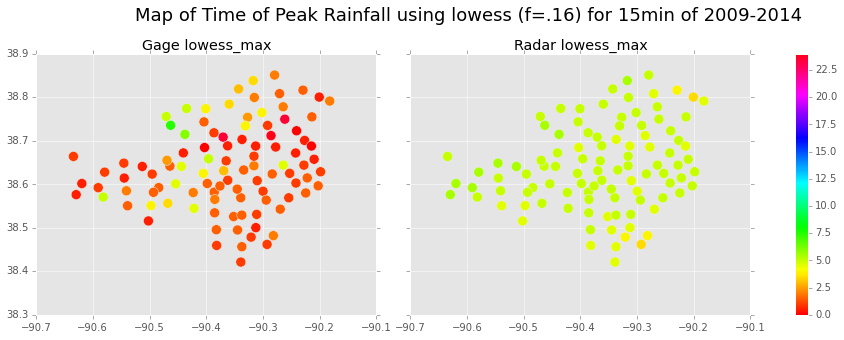

In [9]:
lm_gage = rg.get_max_lowess(df=p.rate.gage, interval='diurnal', f=1/6., example_plot=False).add_prefix('Gage ')
lm_radar = rad.get_max_lowess(df=p.rate.radar, interval='diurnal', f=1/6., example_plot=False).add_prefix('Radar ')
map_rain(p.ll.join((lm_gage, lm_radar)),latlon=True, cmap='hsv', sharec=(0,24), save_path='./output/AGU/',
         title='Map of Time of Peak Rainfall using lowess (f=.16) for 15min of 2009-2014')

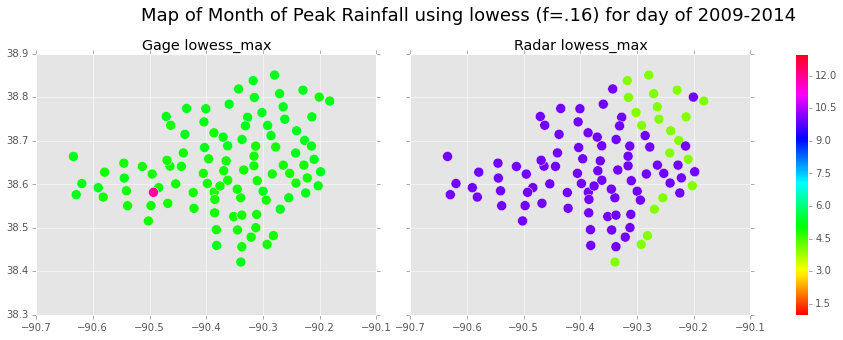

In [11]:
lm_gage = rg.get_max_lowess(interval='seasonal', f=1/6., example_plot=False).add_prefix('Gage ')
lm_radar = rad.get_max_lowess(interval='seasonal', f=1/6., example_plot=False).add_prefix('Radar ')
map_rain(p.ll.join((lm_gage, lm_radar)),latlon=True, cmap='hsv', sharec=(1,13), save_path='./output/AGU/',
         title='Map of Month of Peak Rainfall using lowess (f=.16) for day of 2009-2014')

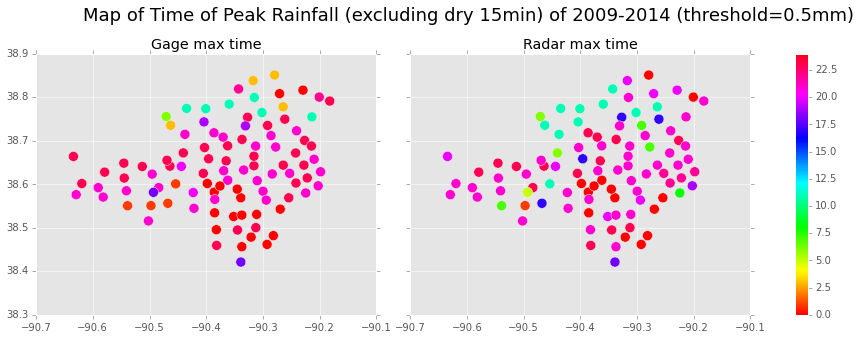

In [14]:
p.thresh = .5*p.per_hour
wet_rate = p.rate.gage[p.rate.gage>=p.thresh]
gb = wet_rate.groupby(wet_rate.index.hour)
df_gage = gb.mean()
wet_rate = p.rate.radar[p.rate.gage>=p.thresh]
gb = wet_rate.groupby(wet_rate.index.hour)
df_radar = gb.mean()

df = pd.DataFrame({'Gage max time': df_gage.idxmax(), 'Radar max time': df_radar.idxmax()})
map_rain(p.ll.join(df), cmap='hsv', sharec=(0,24), save_path=p.save_path, 
         title='Map of Time of Peak Rainfall (excluding dry 15min) of 2009-2014 (threshold={t}mm)'.format(t=p.thresh/p.per_hour))

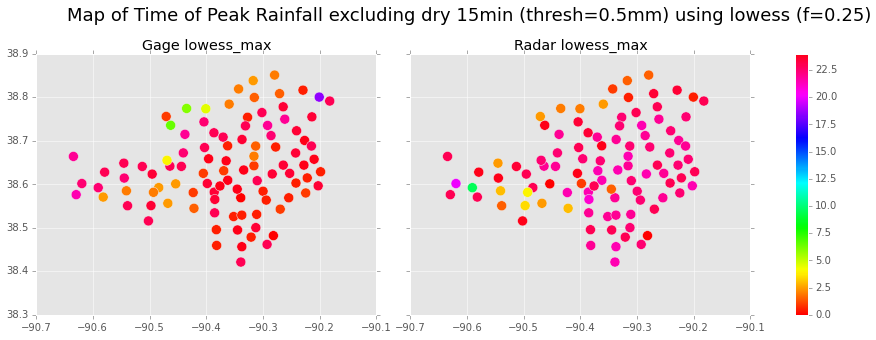

In [15]:
p.thresh = .5*p.per_hour
f = 1/4.
lm_gage = rg.get_max_lowess(df=p.rate.gage[p.rate.gage>=p.thresh], f=f, example_plot=False).add_prefix('Gage ')
lm_radar = rad.get_max_lowess(df=p.rate.radar[p.rate.radar>=p.thresh], f=f, example_plot=False).add_prefix('Radar ')
map_rain(p.ll.join((lm_gage, lm_radar)),latlon=True, cmap='hsv', sharec=(0,24), save_path='./output/AGU/',
         title='Map of Time of Peak Rainfall excluding dry 15min '+
               '(thresh={t}mm) using lowess (f={f})'.format(t=p.thresh/p.per_hour, f=np.round(f, 2)))

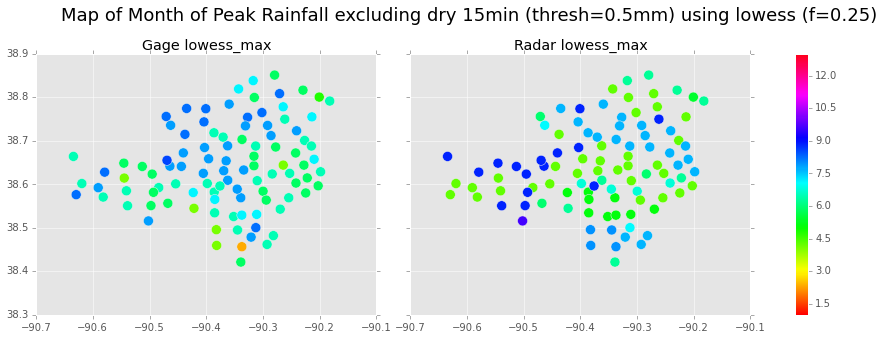

In [16]:
p.thresh = .5*p.per_hour
f = 1/4.
lm_gage = rg.get_max_lowess(df=rg.rate[rg.rate>=p.thresh], f=f, interval='seasonal', example_plot=False).add_prefix('Gage ')
lm_radar = rad.get_max_lowess(df=rad.rate[rad.rate>=p.thresh], f=f, interval='seasonal', example_plot=False).add_prefix('Radar ')
map_rain(p.ll.join((lm_gage, lm_radar)),latlon=True, cmap='hsv', sharec=(1,13), save_path='./output/AGU/',
         title='Map of Month of Peak Rainfall excluding dry 15min '+
               '(thresh={t}mm) using lowess (f={f})'.format(t=p.thresh/p.per_hour, f=np.round(f, 2)))